In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy.fft as spf

In [31]:
data = np.genfromtxt("toys.csv", delimiter=",")
days = data[:, 0]
sales = data[:, 1]

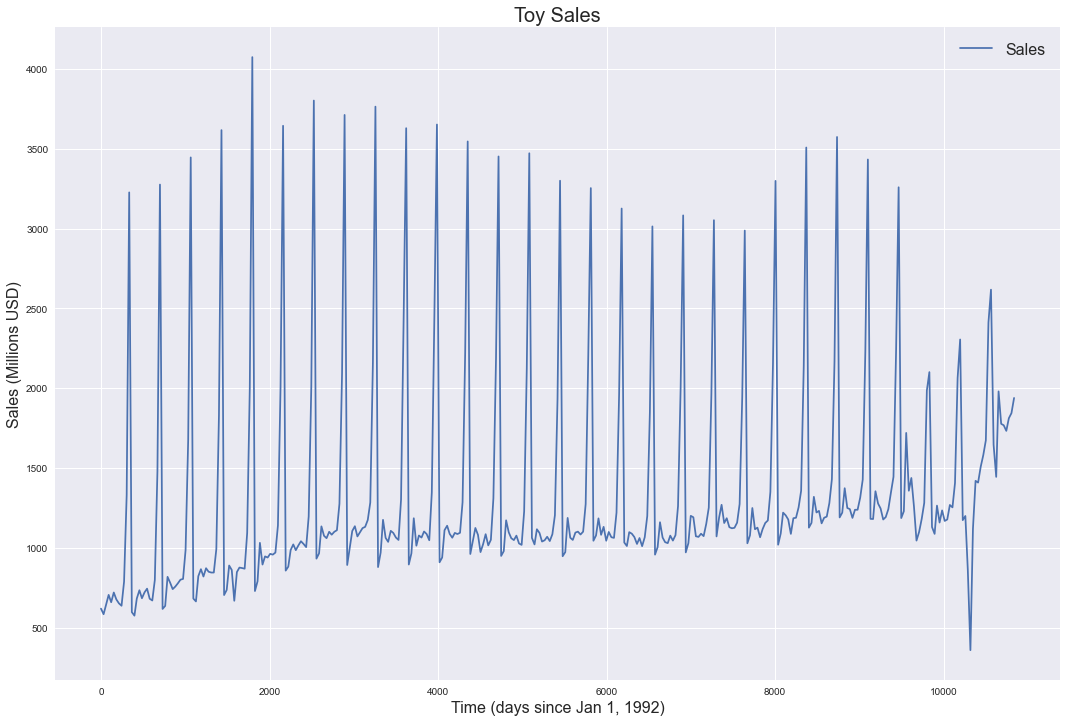

In [32]:
plt.figure(figsize=(18,12))
plt.plot(days, sales, label="Sales")
plt.title("Toy Sales", fontsize=20)
plt.xlabel("Time (days since Jan 1, 1992)", fontsize=16)
plt.ylabel("Sales (Millions USD)", fontsize=16)
plt.legend(fontsize=16)
plt.show()
plt.close()

In [33]:
fft = spf.fftshift(
    spf.fft(sales)
)

dt = np.mean(np.diff(days))
std_dt = np.std(np.diff(days))
print(f"{dt = }, {std_dt = }")

freq = spf.fftshift(
    spf.fftfreq(fft.size, d=dt)
)

fft_max = np.max(np.abs(fft))
normalized_fft = fft / fft_max

dt = 30.43820224719101, std_dt = 0.8135793598822495


Fundamental frequency should be 1/(365 days), since we expect the toy sales to peak each year around the holidays.

In [37]:
fundamental = 1/365
print(f"{fundamental = }")

peaks = np.abs(normalized_fft) > 0.12
fft_peaks = normalized_fft[peaks]
f_peaks = freq[peaks]
for fft_peak, f_peak in zip(fft_peaks, f_peaks):
    print(f"Fourier: {np.abs(fft_peak):.3f} at {f_peak:.5f} 1/days")

fundamental = 0.0027397260273972603
Fourier: 0.122 at -0.01095 1/days
Fourier: 0.133 at -0.00819 1/days
Fourier: 0.174 at -0.00276 1/days
Fourier: 1.000 at 0.00000 1/days
Fourier: 0.174 at 0.00276 1/days
Fourier: 0.133 at 0.00819 1/days
Fourier: 0.122 at 0.01095 1/days


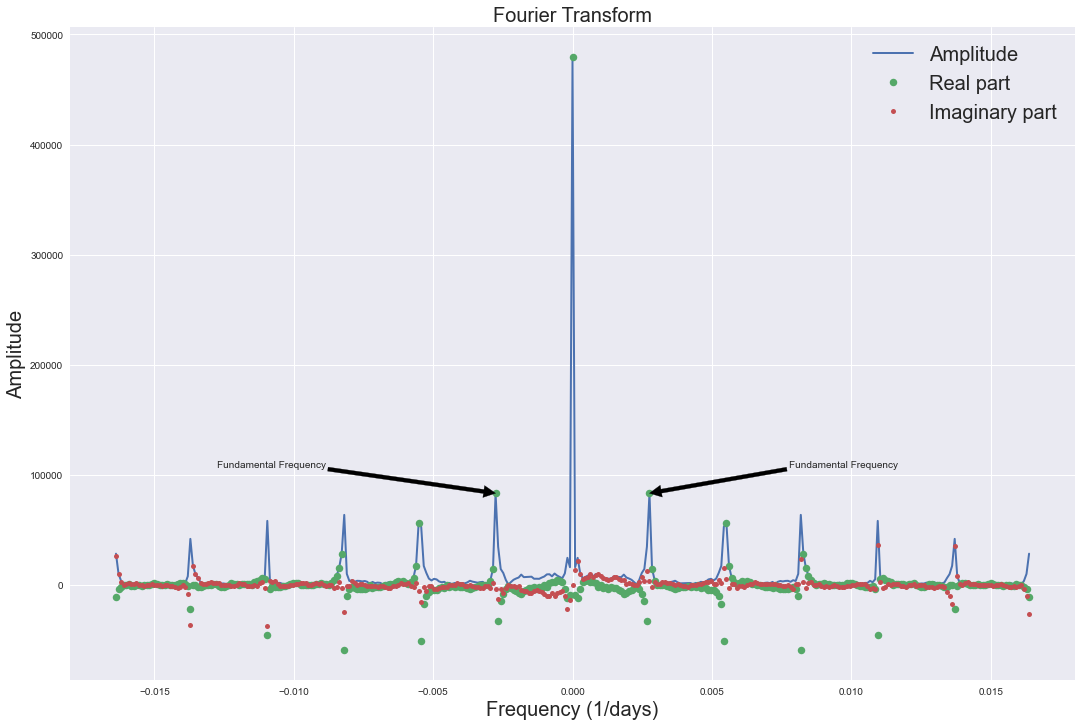

In [35]:
plt.figure(figsize=(18, 12))
plt.plot(freq, np.abs(fft), "-", linewidth=2, label="Amplitude")
plt.plot(freq, np.real(fft), ".", markersize=15, label="Real part")
plt.plot(freq, np.imag(fft), ".", markersize=10, label="Imaginary part")
plt.legend(fontsize=20)
plt.title("Fourier Transform", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Frequency (1/days)", fontsize=20)

plt.annotate(
    "Fundamental Frequency",
    (-0.00276, fft_max * 0.174),
    (-0.00276 - 0.01, fft_max * (0.174 + 0.05)),
    arrowprops=dict(facecolor='black', shrink=1)
)

plt.annotate(
    "Fundamental Frequency",
    (0.00276, fft_max * 0.174),
    (0.00276 + 0.005, fft_max * (0.174 + 0.05)),
    arrowprops=dict(facecolor='black', shrink=1)
)

plt.show()
plt.close()

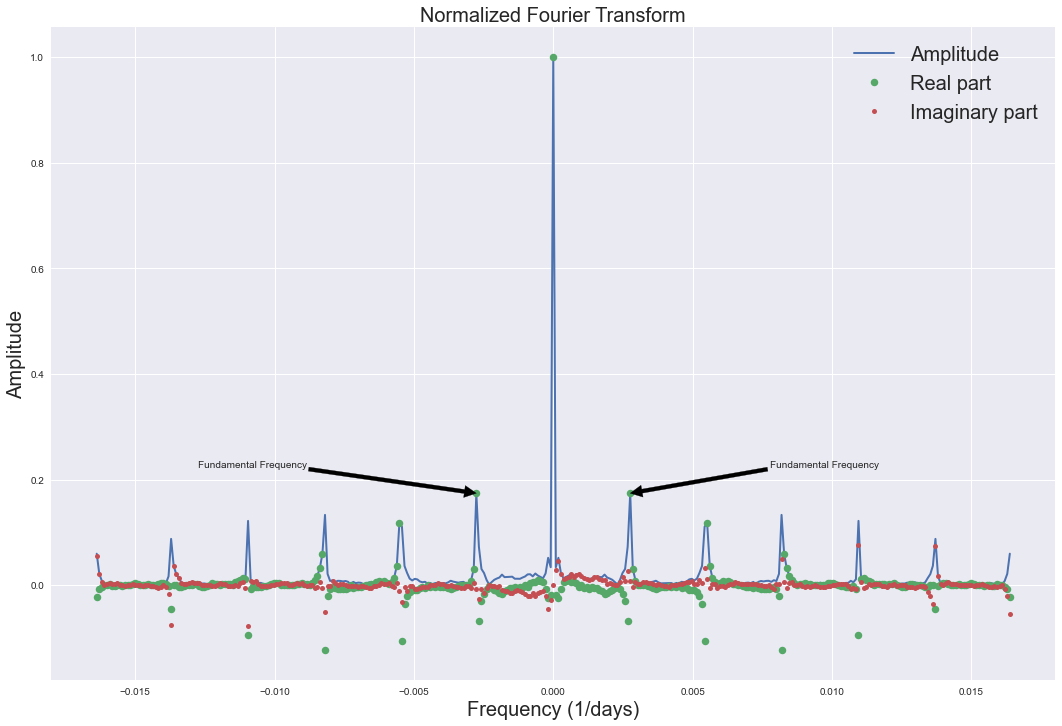

In [36]:
plt.figure(figsize=(18, 12))
plt.plot(freq, np.abs(normalized_fft), "-", linewidth=2, label="Amplitude")
plt.plot(freq, np.real(normalized_fft), ".", markersize=15, label="Real part")
plt.plot(freq, np.imag(normalized_fft), ".", markersize=10, label="Imaginary part")
plt.legend(fontsize=20)
plt.title("Normalized Fourier Transform", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Frequency (1/days)", fontsize=20)

plt.annotate(
    "Fundamental Frequency",
    (-0.00276, 0.174),
    (-0.00276 - 0.01, 0.174 + 0.05),
    arrowprops=dict(facecolor='black', shrink=1)
)

plt.annotate(
    "Fundamental Frequency",
    (0.00276, 0.174),
    (0.00276 + 0.005, 0.174 + 0.05),
    arrowprops=dict(facecolor='black', shrink=1)
)

plt.show()
plt.close()